# Brendan Quinn 21xxxxxx, Milan Kovacs 21308128

Code runs to execution

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix
import os.path
from keras import utils
import keras
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import GridSearchCV

# Code taken from the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron
print("Imported all the libraries")

In [3]:
# Load Data
path = f"C:\\Users\\{os.getlogin()}\\.cache\\kagglehub\\datasets\\misrakahmed\\vegetable-image-dataset\\versions\\1\\Vegetable Images"

# Check if dataset is downloaded
if not os.path.exists(path):
    kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")
    path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kmila\.cache\kagglehub\datasets\misrakahmed\vegetable-image-dataset\versions\1\Vegetable Images


In [31]:
# Get the list of images:
NO_SETS = 15
i = 0
FOLDERS = ["train", "test", "validation"]
dataset_map = {i: [] for i in FOLDERS}

for folder in FOLDERS:
    for root, dirs, files in os.walk(f"{path}\\{folder}"):
        vegetable_type = os.path.basename(root)
        
        for file in files:
            file_path = os.path.join(root, file)
            image = keras.utils.load_img(file_path)
            dataset_map[folder].append((image, vegetable_type))

for i in dataset_map:
    print(f"Dataset {i} has {len(dataset_map[i])} images")   


Dataset train has 15000 images
Dataset test has 3000 images
Dataset validation has 3000 images


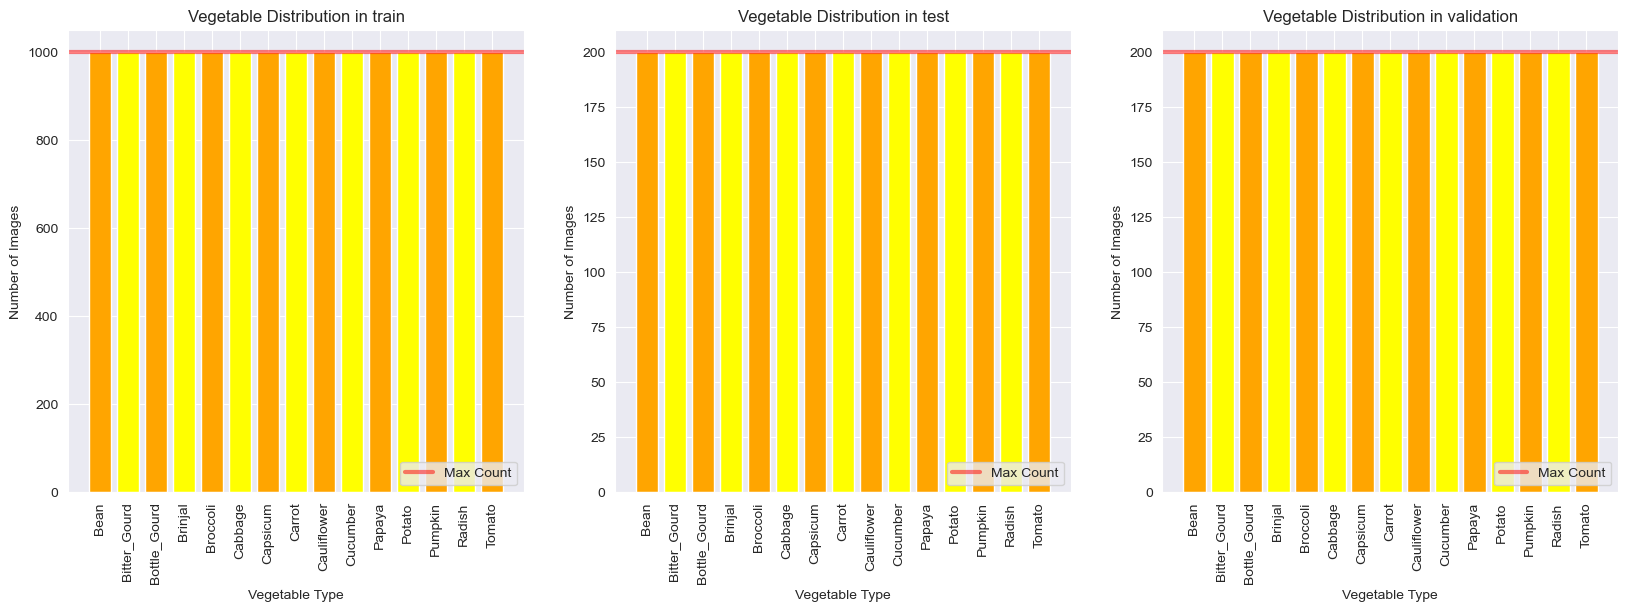

In [32]:
# Bar chart
fig, axis = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(20)

vegetable_types = set()

for index, set_type in enumerate(dataset_map):
    vegetable_types.add(set_type)
    plot = axis[index]
    vegetables_data_set = [x[1] for x in dataset_map[set_type]]
    
    vegetables_counts = Counter(vegetables_data_set)
    plot.title.set_text(set_type)
    plot.bar(vegetables_counts.keys(), vegetables_counts.values(), color=['orange', 'yellow'])
    x_axis = plot.get_xticklabels()
    plot.tick_params(axis='x',  labelsize=10, labelrotation=90)
    plot.set(xlabel = 'Vegetable Type', ylabel='Number of Images', title=f"Vegetable Distribution in {set_type}")
    
    max_count = max(vegetables_counts.values())
    plot.axhline(y=max_count, color='red', linestyle='-', label='Max Count', linewidth=3, alpha=0.5)
    
    plot.legend(loc='lower right')
plt.show()

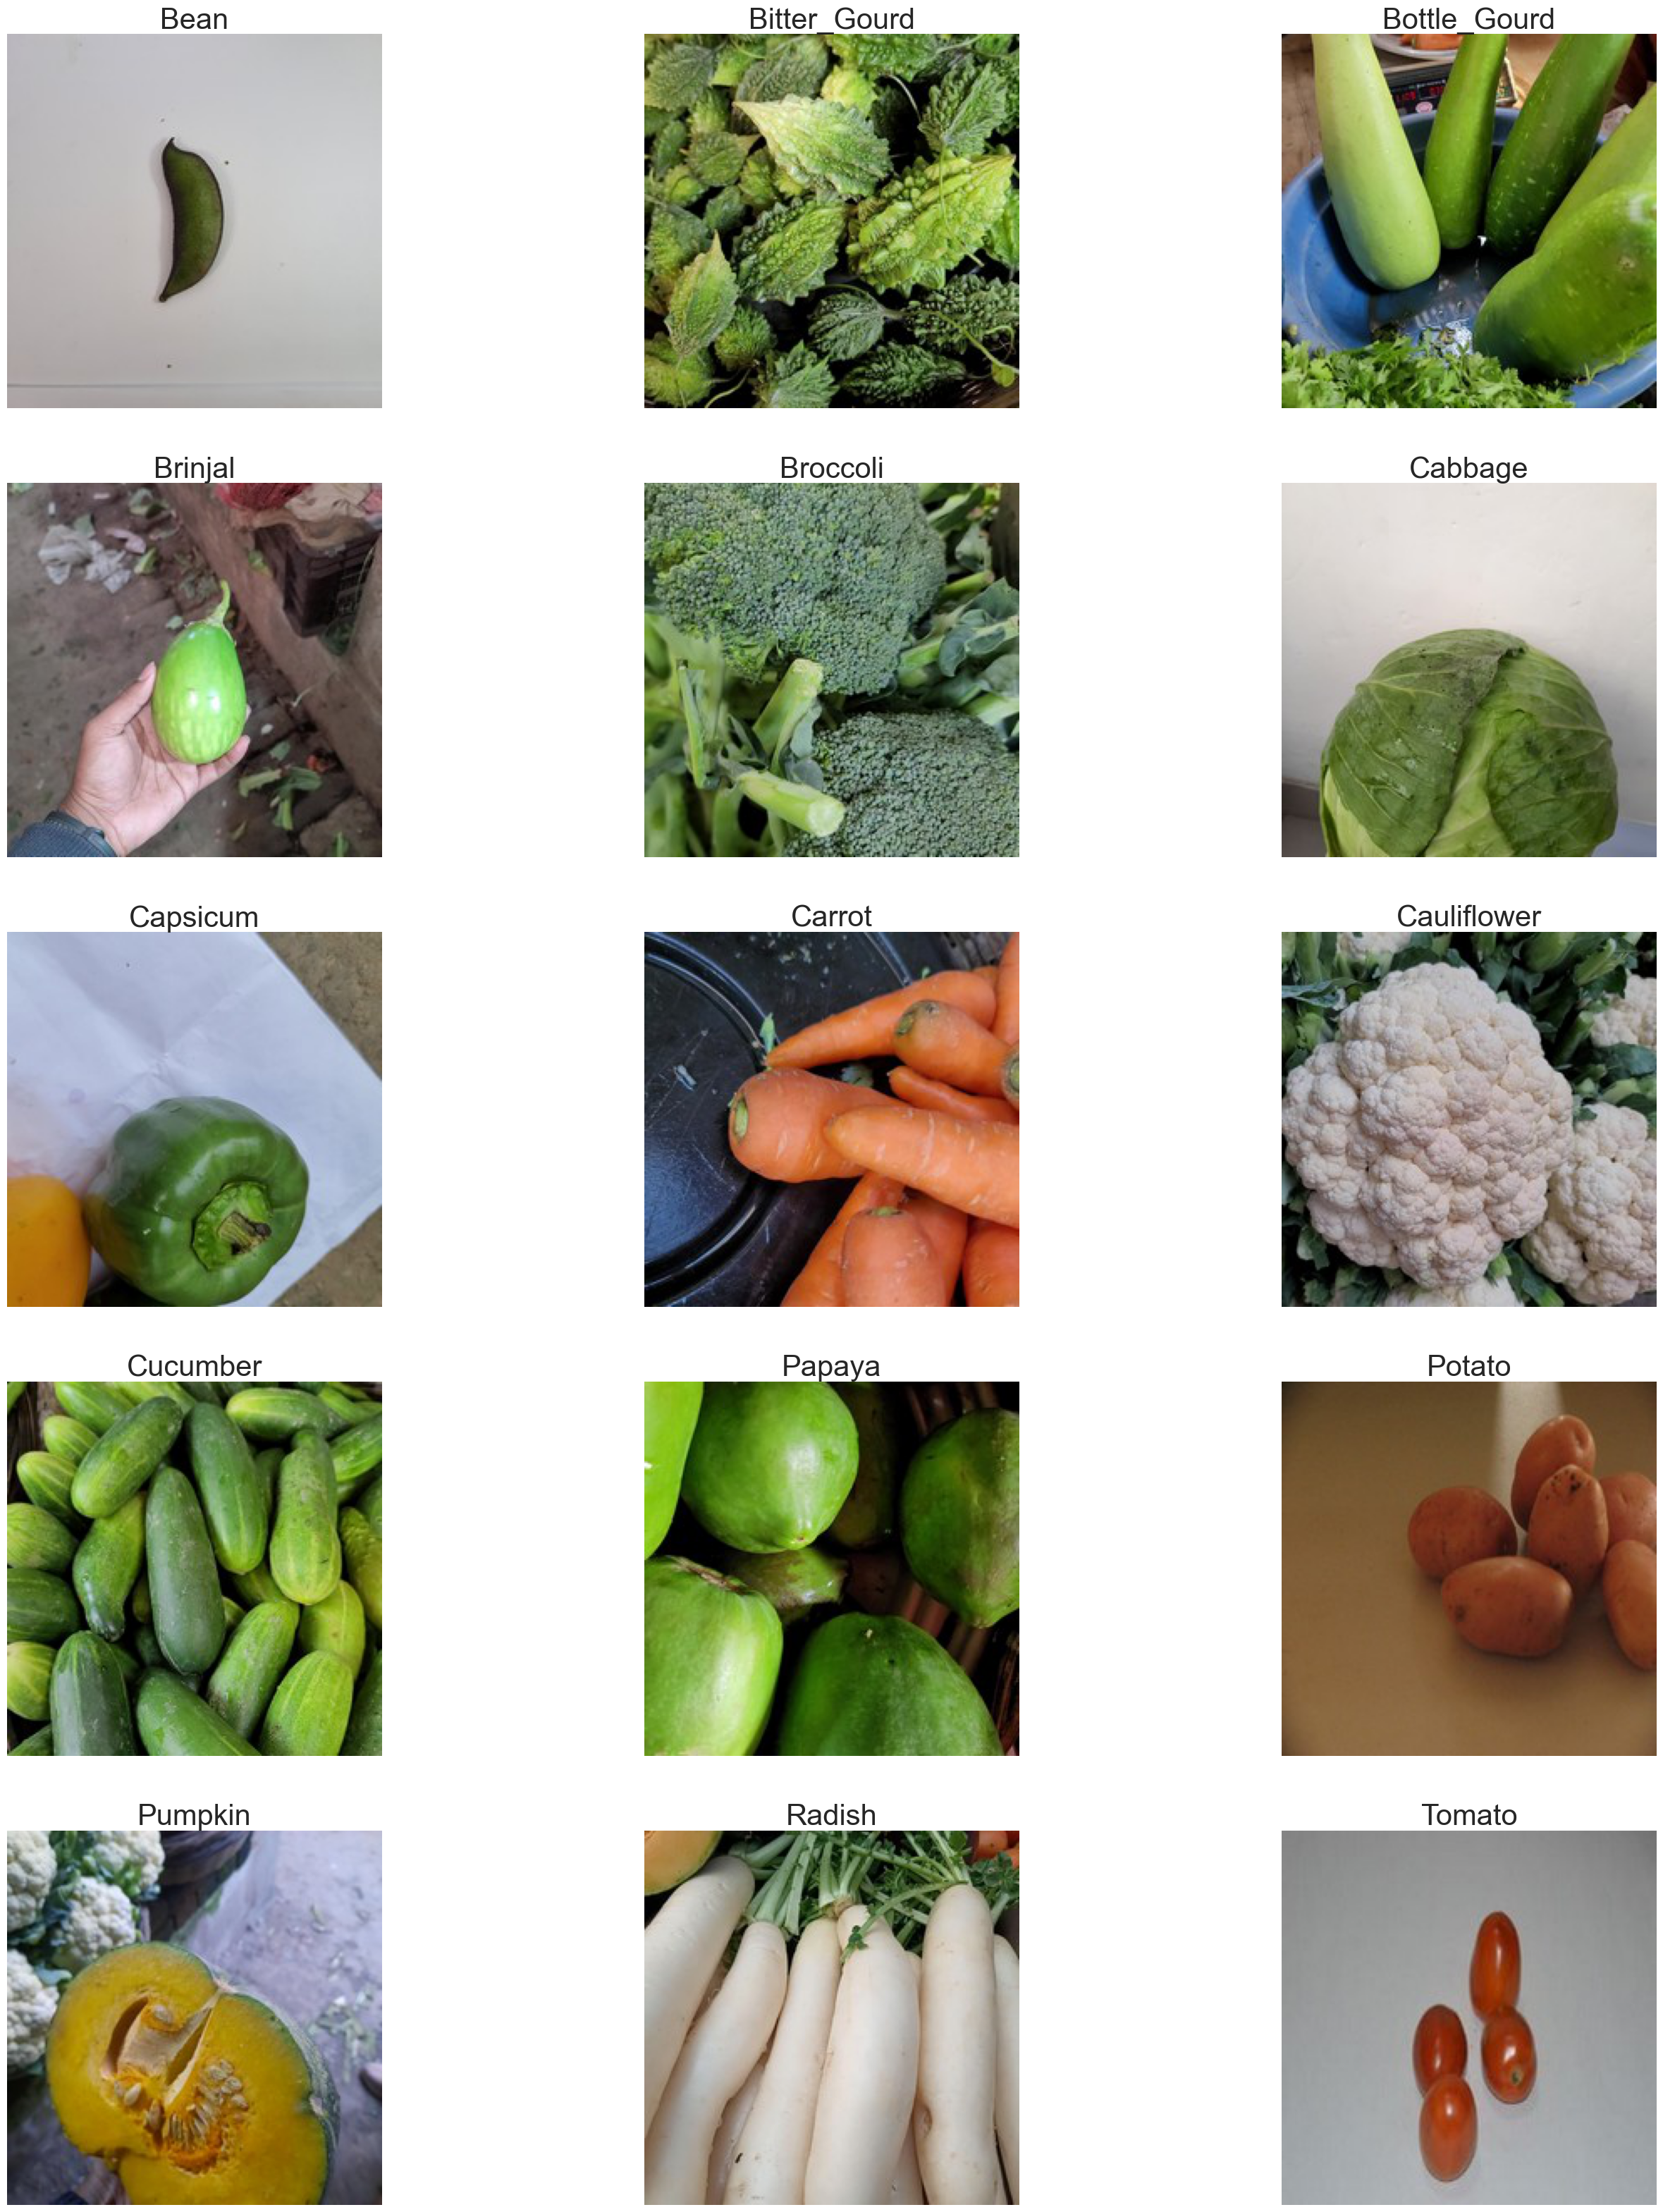

In [30]:
# Sample images
np.random.seed(42)

X_train, y_train = zip(*dataset_map["train"])
X_test, y_test = zip(*dataset_map["test"])
X_val, y_val = zip(*dataset_map["validation"])

sample_images = []

fig, axis = plt.subplots(5, 3)
fig.set_figheight(40)
fig.set_figwidth(35)
plt.subplots_adjust(hspace=0.2, wspace=0.0)

for i in range(1, 15 * 1000 + 1, 1000):
    sample_images.append(
        (X_train[i - 1], y_train[i - 1])
    )

for index, (image, label) in enumerate(sample_images):
    plot = axis[index // 3, index % 3]
    plot.imshow(image)
    plot.set_title(label, size=30)
    plot.axis("off")

plt.show()

Intensity distribution for train set:


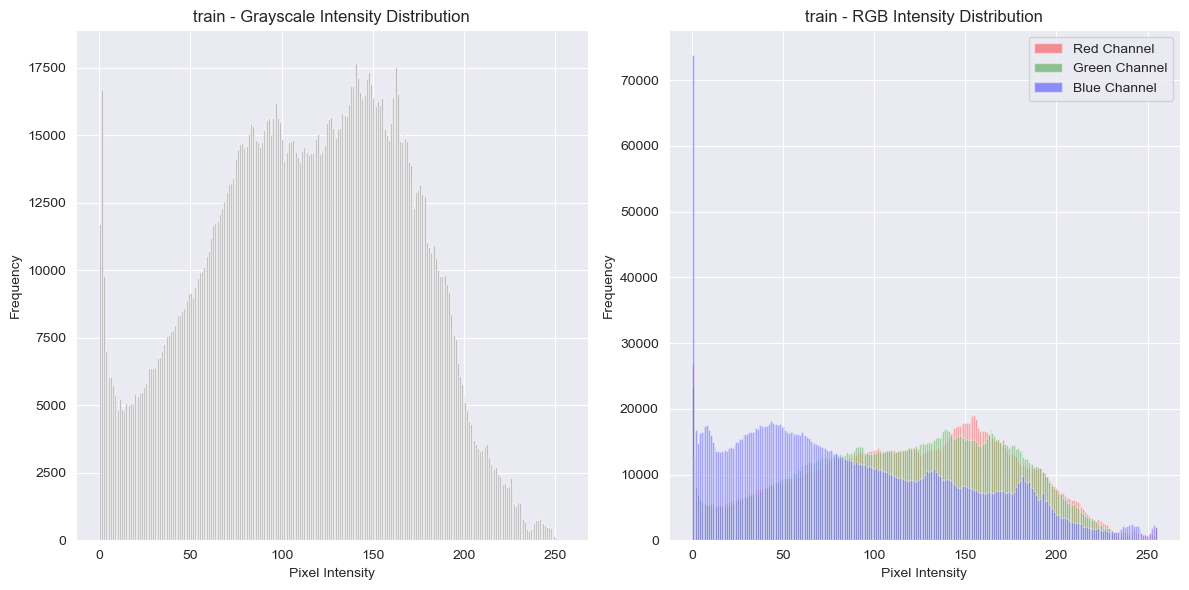

Intensity distribution for test set:


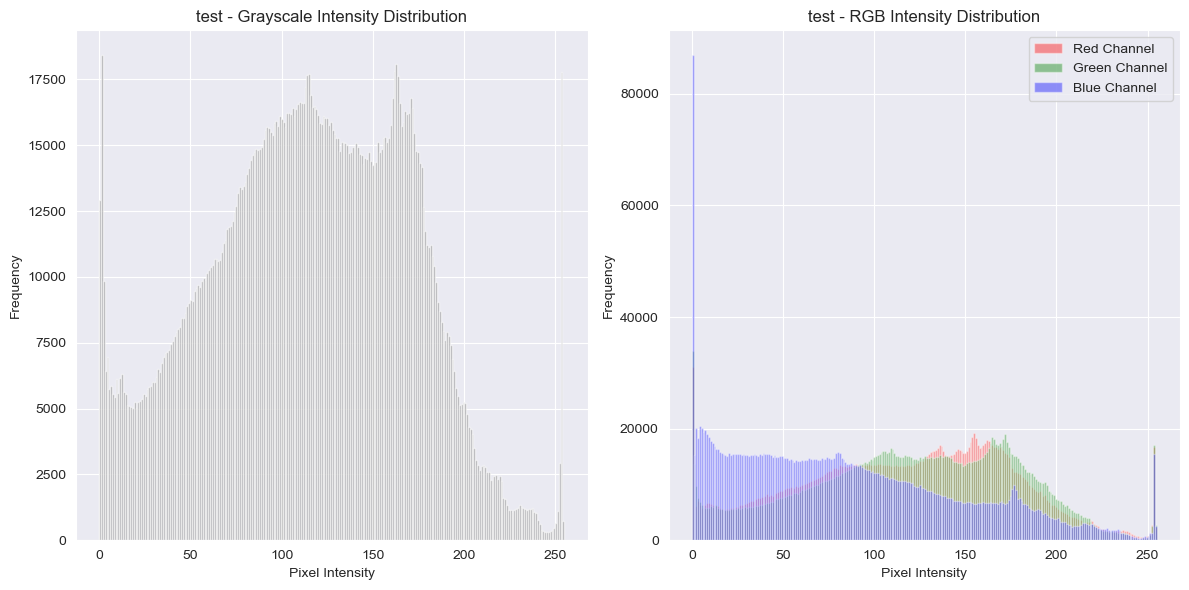

Intensity distribution for validation set:


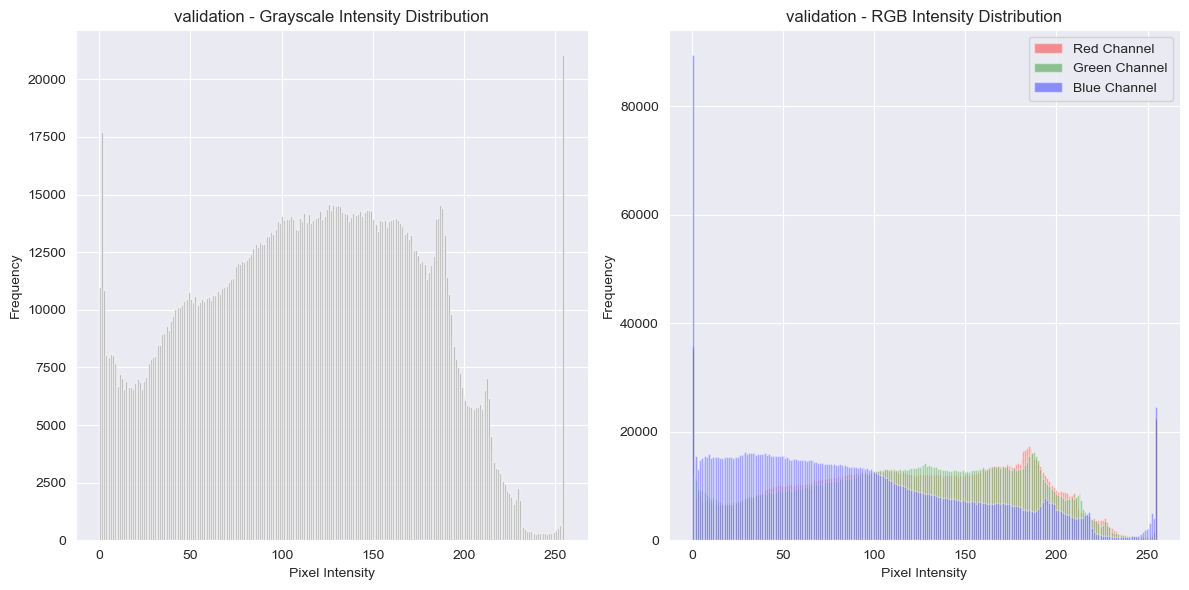

In [99]:


def plot_intensity_distribution(dataset_map, num_samples=50):
    """Visualizes the intensity distribution of images in each set and each channel."""
    for set_type in dataset_map:
        print(f"Intensity distribution for {set_type} set:")
        
        # Initialize lists to accumulate pixel values
        all_pixels_grayscale = []
        all_pixels_red = []
        all_pixels_green = []
        all_pixels_blue = []
        
        # Randomly sample a subset of images to avoid excessive computation
        sampled_images = np.random.sample(dataset_map[set_type], min(num_samples, len(dataset_map[set_type])))
        
        for img, _ in sampled_images:
            # Convert to grayscale and extract pixel values
            img_gray = img.convert("L")
            all_pixels_grayscale.extend(np.array(img_gray).flatten())
            
            # Extract color channels
            img_rgb = img.convert("RGB")
            red, green, blue = img_rgb.split()
            all_pixels_red.extend(np.array(red).flatten())
            all_pixels_green.extend(np.array(green).flatten())
            all_pixels_blue.extend(np.array(blue).flatten())
        
        # Plot histograms
        plt.figure(figsize=(12, 6))
        
        # Grayscale histogram
        plt.subplot(1, 2, 1)
        plt.hist(all_pixels_grayscale, bins=256, color="gray", alpha=0.6)
        plt.title(f"{set_type} - Grayscale Intensity Distribution")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        
        # RGB Channel Histograms
        plt.subplot(1, 2, 2)
        plt.hist(all_pixels_red, bins=256, color="red", alpha=0.4, label="Red Channel")
        plt.hist(all_pixels_green, bins=256, color="green", alpha=0.4, label="Green Channel")
        plt.hist(all_pixels_blue, bins=256, color="blue", alpha=0.4, label="Blue Channel")
        plt.title(f"{set_type} - RGB Intensity Distribution")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Call the function with your dataset map
plot_intensity_distribution(dataset_map)


In [ ]:
# Cross-validation


In [ ]:
# Data transformation
## Transform an attribute to one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

## There is a section of the book that talks about custom transformers

## Might be worth looking into Transformation Pipeliens

In [ ]:
# Model Configuration

# Chapter 2: Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
def create_model() -> keras.models.Sequential:
    pass

# Varying hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.02, 0.03],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'dropout_rate': [0.1, 0.2, 0.3],
    'neurons': [64, 128, 256],
}

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error']
model = KerasClassifier(build_fn=create_model, verbose=0)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Finished running all models")

In [ ]:
# Get best configuration
print(grid_search.best_params_)

In [ ]:
# Train Model

In [ ]:
# Evaluate Model